<img style="float: right;" src="attachment:04f31c53-483e-4bae-a4ef-aeed484c3692.png">

# Exploratory Analysis of Torob Search Data

Greetings and a warm welcome from Torob Data Team!

We are very excited to share with you the Torob's search data for the task of exploratory data analysis as part of OpenAI Summer School 2022. The data consists of users' search logs as well as their clicks on search results in Torob. It also includes information for a sample of the products and product categories. In this notebook, you will analyze this data and answer some questions with the goal of practicing your data analysis skills (especially the ability to work with Pandas) and also extract insightful information from our users' searches and their interaction with the search results.

Note that our original daily search data is very large (you may need gigabytes of RAM and disk space to handle the data of just one day!). So, for practical purposes and due to the size constraints, the original data has been sampled and reduced, and what you'll work with is just a small fraction of the data of one week. 

The sections marked with a triangular flag (🚩) are those which you need to read and answer. Allright, without further ado let's get started!

(NOTE: Here is the link to the guideline document of the project: https://docs.google.com/document/d/1r46gWcSXwvxxpS92cOqqA7pLuX1Vq673rokgwtnafb8/edit?usp=sharing)

---

## Import modules/libraries

So, as usual, we first need to import the neccessary libraries and modules which we would use:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

---

## Load and Inspect Data

In this section we load the data from given files, and then we take a quick look at their structure and make sure they have been loaded properly.

### 🚩Load data from disk

First, we need to load the data from disk as Pandas dataframes. There are four different dataframes which need to be loaded:
- Search logs, stored in `search_logs.pkl`.
- Search click logs, stored in `search_click_logs.pkl`.
- Products info, stored in `products.pkl`.
- Product categories info, stored in `categories.pkl`.

Let's load them all and store each of them in a separate variable:

**Write the answer below:** \
(Hint: Since they are stored as *pickled* files, we can easily use `pd.read_pickle` function.)

In [2]:
SDF= pd.read_pickle("data\search_logs.pkl") # search data table
CDF= pd.read_pickle("data\search_click_logs.pkl") #Click table
PDF= pd.read_pickle("data\products.pkl") # Products table
GDF= pd.read_pickle("data\categories.pkl") # categories Table


### 🚩A quick peek at the data

To quickly get a feel of the strucure of the data and see if it has been loaded correctly, we can check the first few rows of the dataframes. Let's take a look at the first five rows of each dataframe we loaded in the previous step:

**Write the answer below:** \
(Hint: heads or tails?!)

In [3]:
SDF.tail()

,id,raw_query,result,datetime,category_id,user_id
539284,komsy,گیره تزیینی مو,"[5453845, 8144670, 929409, 2560009, 2945123, 1...",2022-05-17 11:40:45.256000+00:00,NaN,HBGXD
539285,rgtin,دراپ بنر بی تی اس,"[4651071, 7207811, 3198227, 5668360, 3934514, ...",2022-05-16 17:22:19.306000+00:00,NaN,RKJDP
539286,ouixi,مینی فرز رونیکس,"[3627110, 6731253, 3386983, 678951, 5285940, 3...",2022-05-18 11:55:34.127000+00:00,NaN,QGIDE
539287,cnemi,t295,"[3789177, 1968708, 459464, 5077881, 6612780, 1...",2022-05-14 10:50:27.468000+00:00,NaN,XHCNF
539288,afnwn,سرویس قابلمه,"[7674912, 3037094, 3876156, 8439562, 746455, 4...",2022-05-17 10:59:08.572000+00:00,NaN,MVVMZ


In [4]:
CDF.head()

,id,datetime,search_id,rank
0,jstyz,2022-05-13 19:30:14.030000+00:00,iitnm,1
1,ewusk,2022-05-13 19:30:24.290000+00:00,scjlb,2
2,osnio,2022-05-13 19:30:24.394000+00:00,ohuqq,6
3,expgi,2022-05-13 19:30:30.500000+00:00,pzrcn,3
4,srgdy,2022-05-13 19:30:32.884000+00:00,mhlmr,5


In [5]:
PDF.tail()

,id,title,category_id
108041,1985506,اسلایم سارا در انواع طرح و نوع متنوع با کیفیت ...,4062
108042,5278787,پک تخصصی کُرگیری(2دستگاه،5مته و 48سگمنت),3830
108043,8977011,پیراهن مردانه Dior مدل 28793,4107
108044,2157337,پیراهن مردانه Dior مدل 28794,4107
108045,8432560,کیف دخترانه مدل جدید شیک کد 7929,4810


In [6]:
GDF.sample(5)

,title,id,parent_category_id
572,سوخاری ها,1406,507.0
2919,جعبه و گوی موزیکال,7248,2701.0
2835,واشر منیفولد خودرو,7217,3378.0
2950,تخم بلدرچین,6960,3676.0
1362,محافظ صفحه مانیتور خودرو,5535,547.0


---

## Data Validation

Before starting our analysis, it's a good practice to validate the consistency of the data values and constraints with our expectations. There are various validity checks that could be done, and below we give you two examples.

### 🚩Validate uniquness of ID columns

For example, we can confirm whether all the unique ID columns (i.e. `id` column) have no duplicate values for all the dataframes we have. Let's check this for all the four dataframes:

**Write the answer below:**

In [7]:
print("there are", SDF.id.duplicated().sum(), "duplicated rows in search logs")
print("there are", PDF.id.duplicated().sum(), "duplicated rows in Product info")
print("there are", CDF.id.duplicated().sum(), "duplicated rows in search click logs")
print("there are", GDF.id.duplicated().sum(), "duplicated rows in Product categories info")

there are 0 duplicated rows in search logs
there are 0 duplicated rows in Product info
there are 0 duplicated rows in search click logs
there are 0 duplicated rows in Product categories info


### 🚩Validate all the search clicks have a valid rank value

Here, we would like to check two things about the rank of search click records: 1) they have no NaN value, 2) they are all between 0 and 9 (because searches have at most 10 results). Let's do these checks:

**Write the answer below:**

In [8]:
print("there are", (CDF['rank']>10).sum(), "Rank values greater than 9")
print("there are", (CDF['rank'].isna()).sum(), "NaN Rank values ")

there are 0 Rank values greater than 9
there are 0 NaN Rank values 


---

## Exploratory Data Analysis (EDA)

Now that we have loaded the data, we are ready to start the processing and analysis of our data.

### 🚩Number of searches and search clicks

The most basic stat we can get from our data is the number of searches and search clicks we have. Let's find and print them:

**Write the answer below:**

In [9]:
print('there are ', SDF.id.count(), 'serach logs in dataset')
print('there are ', CDF.id.count(), 'serach click logs in dataset')

there are  539289 serach logs in dataset
there are  295692 serach click logs in dataset


### 🚩Number of unique search queries

We can also calculate the number of unique search queries.

**Write the answer below:**

In [10]:
print('there are', SDF['raw_query'].nunique(),'unique raw search query values in the dataset')

there are 260193 unique raw search query values in the dataset


### 🚩Number of unique users

Another basic stat is the number of unique users who searched on Torob. We can use `user_id` column to calculate this:

**Write the answer below:**

In [11]:
print('there are', SDF['user_id'].nunique(),'unique users in the dataset')

there are 311083 unique users in the dataset


### 🚩Most frequent search queries

We would like to know which search queries are the most popular (i.e. most frequent). We can use the "search logs" data to find the answer. Find the top 20 most searched queries along with their number of searches:

**Write the answer below:**

In [12]:
# get top 20 most frequent names
n = 20
print('Top 20 of most popular search queries are')
SDF['raw_query'].value_counts()[:n].index.tolist()


Top 20 of most popular search queries are


['iphone',
 'دلار امریکا ',
 'کفش',
 'روغن',
 'لپ تاپ ایسوس',
 'دوربین عکاسی',
 'شیر',
 'دوچرخه 26',
 'xbox series s',
 'لباس عروس',
 'گوشی',
 'روغن موتور',
 'ماکروویو',
 'xiaomi 12 pro',
 'کاغذ a4',
 'تلویزیون',
 'گوشی سامسونگ',
 'دوچرخه',
 'یخچال',
 'روغن خوراکی']

### 🚩Distribution of length of search queries

We expect that the majority of search queries consist of at most three words. Let's confirm our expectation by calculating the number of words in each search query and then aggregate these values to see how the length of queries is distributed (i.e. find the distribution of number of words in search queries):

**Write the answer below:**  
(Hint: for the sake of simplicity, you can assume that in each search query the words are separated from each other by one or more whitespace characters. Yes, we know this is a simplification and has errors, but it's a good approximation. Further, note that the `str` acessor in Pandas gives you a lot of good methods for processing columns of type string and list.)

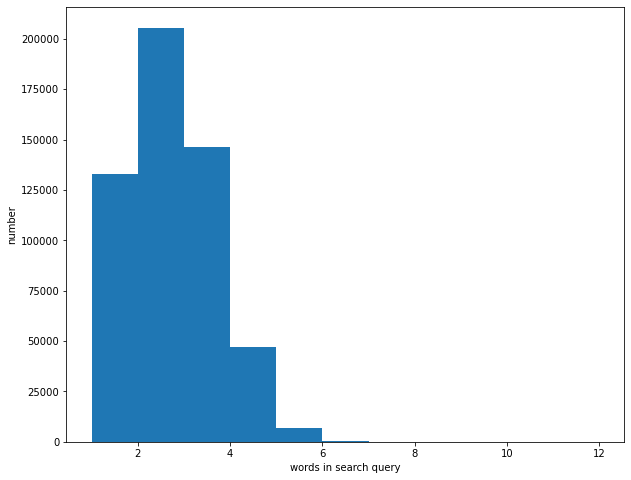

In [13]:
Word_counts= SDF.raw_query.str.count(' ')+1

plt.figure(figsize=(10,8))
plt.hist(Word_counts, bins= max(Word_counts)-1)
# Tamiz kari
plt.xlabel('words in search query')
plt.ylabel('number')
plt.rcParams.update({'font.size': 22}) # change fontsize of axis to 22

### 🚩Most common words in search queries

Which words were most commonly used in the search queries? Find the top 20 most common words along with their number of occurrences in search queries:

**Write the answer below:**  
(Hint: split + explode!!!)

In [14]:
Word_List= SDF.raw_query.str.split(' ').explode() # transforming raw query to list of search query words
Word_List= Word_List.drop(Word_List[Word_List.str.len()<1].index) # droping space rows of the list
print('Top 20 of most popular search words are')
Word_List.value_counts()[:n].index.tolist()

Top 20 of most popular search words are


['گوشی',
 'روغن',
 'iphone',
 'موتور',
 'کفش',
 'pro',
 'دوچرخه',
 'سامسونگ',
 'لباس',
 'ماشین',
 'پراید',
 'ساعت',
 'کولر',
 'برقی',
 'ای',
 'تاپ',
 'مردانه',
 'دوربین',
 'لپ',
 'یخچال']

### 🚩Localize date and time values

Currently, the date & time values in the search and search-click dataframes are stored in UTC timezone. This is a best-pratice to store timestamp values in UTC when the data is stored in databases; however, for our next time-based analyses to be more understandable, we need to convert them all to Tehran timezone.

Convert and replace the `datetime` columns in both search and search-click dataframes:

**Write the answer below:**  
(Hint: in Pandas, datetime columns have a `dt` accessor which offers some methods for manipulation of datetime values. Here, you should look for `tz_convert` method and use `'Asia/Tehran'` as the timezone.)

In [15]:
SDF.head()

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU


In [16]:
SDF.datetime= SDF.datetime.dt.tz_convert('Asia/Tehran')
SDF.head()
# tz = timezone(timedelta(hours=4, minutes=30), 'Asia/Tehran')

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 17:47:22.701000+04:30,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 15:54:02.385000+04:30,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-15 00:05:31.691000+04:30,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 22:50:55.328000+04:30,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-14 00:20:03.519000+04:30,3196.0,TJLWU


### 🚩Number of searches and search-clicks per weekday

Now that we have converted the datetime to Tehran timezone, we are interested to know how many searches and search-clicks exist per weekday (i.e. Saturday, Sunday, Monday, etc.). We expect that both of these numbers to be a bit lower on weekends (i.e. Thursday and Friday).

Calculate the number of searches and search-clicks per weekday and plot both alongside each other in a single bar plot:

**Write the answer below:**  
(Hint: again, you can use the methods which exist via `dt` accessor to get the weekday of datetime values. As a challenge, try to write all the calculations and plotting in just a single python statement by using method chaining... a lot!)

In [17]:
print('Search per day is as follows:')
print((SDF['datetime'].dt.weekday).value_counts().reset_index().sort_values('index').set_index('index'))
print('\n click per day is as follows:')
print((CDF['datetime'].dt.weekday).value_counts().reset_index().sort_values('index').set_index('index'))
print('as expected click per day and search per day drops at weekends (3-4 :thr- fri)')

Search per day is as follows:
       datetime
index          
0         77720
1         79031
2         77305
3         74457
4         73723
5         80032
6         77021

 click per day is as follows:
       datetime
index          
0         42949
1         42556
2         42611
3         41032
4         41024
5         43580
6         41940
as expected click per day and search per day drops at weekends (3-4 :thr- fri)


### 🚩Number of searches and search-clicks per hour of day

Next, we would like to know which hour during the day has the most search traffic.

Calculate the number of searches and search-clicks per hour and plot both alongside each other in a single bar plot (note that we are just interested in the hour regardless of the specific day; so the result should be aggregated based on hour **over all the days**):

**Write the answer below:**  
(Hint: again, `dt` accessor is your friend here as well!)

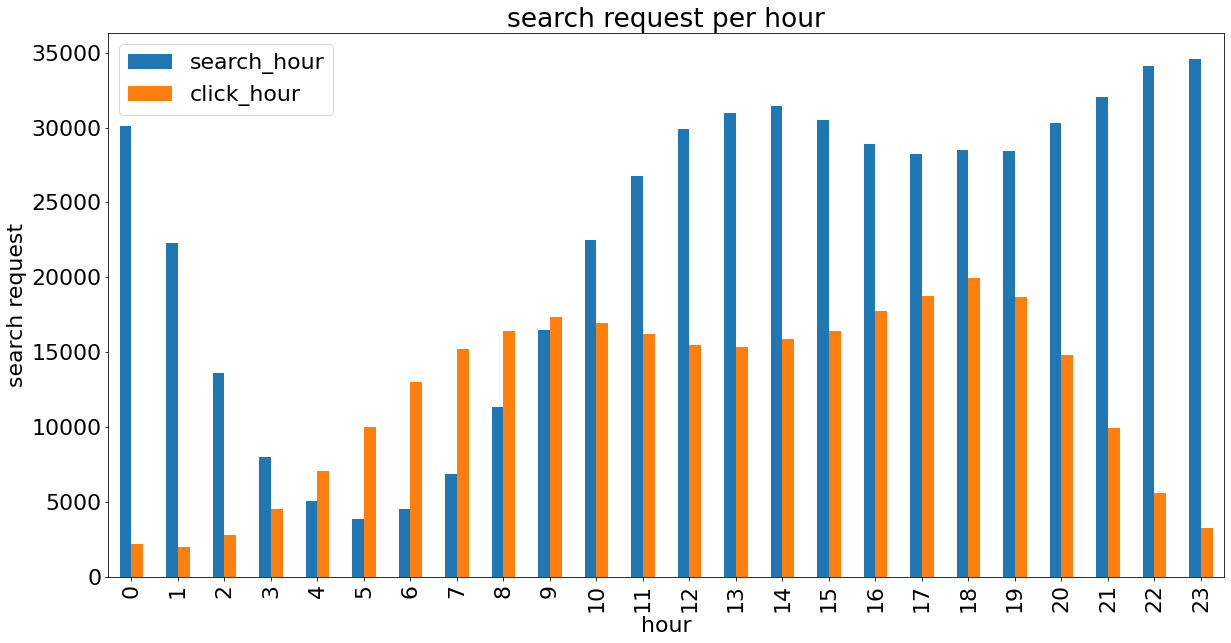

In [18]:
df_hour=((SDF['datetime'].dt.hour).value_counts().reset_index().sort_values('index')).set_index('index').rename(columns={'datetime':'search_hour'})
df_hour['click_hour']=((CDF['datetime'].dt.hour).value_counts().reset_index().sort_values('index')).set_index('index').datetime
df_hour.plot.bar()
plt.xlabel('hour')
plt.ylabel('search request')
plt.title('search request per hour')
fig = plt.gcf()
fig.set_size_inches(20, 10)

### 🚩Top 10 most frequent search queries per weekday

Now, instead of calculating the most frequent queries over all the timeframe of the data, we would like to find the top 10 most frequent queries per weekday (note that we don't need the number of searches for each query; we are just interested in the queries themeselves).

**Write the answer below:**  

In [31]:
SDF['weekday']= SDF.datetime.dt.weekday
n=10
# SDF.groupby(['weekday']).raw_query.value_counts().nlargest(10)
top_n_query= np.reshape(SDF.groupby(['weekday'])['raw_query'].value_counts().groupby(level=0).nlargest(n).index.get_level_values(2),(7,n))
# print(top_n_query)
pd.DataFrame(top_n_query, columns= range(0,n), index= ['Mon', 'Thu', 'Wed', 'Thr', 'Fri', 'Sat', 'Sun'])

,0,1,2,3,4,5,6,7,8,9
Mon,iphone,دوچرخه 26,روغن,کفش,روغن موتور,لپ تاپ ایسوس,دوربین عکاسی,xbox series s,شیر,کفش زنانه
Thu,iphone,دلار امریکا,کفش,لباس عروس,روغن,شیر,xiaomi 12 pro,کاغذ a4,لپ تاپ ایسوس,دوربین عکاسی
Wed,iphone,دلار امریکا,کفش,لباس عروس,شیر,روغن,لپ تاپ ایسوس,xiaomi 12 pro,کاغذ a4,دوربین عکاسی
Thr,iphone,دلار امریکا,کفش,لباس عروس,شیر,روغن,لپ تاپ ایسوس,دوربین عکاسی,xiaomi 12 pro,کاغذ a4
Fri,iphone,دلار امریکا,کفش,لباس عروس,شیر,دوربین عکاسی,xiaomi 12 pro,لپ تاپ ایسوس,کاغذ a4,روغن
Sat,iphone,روغن,کفش,روغن موتور,دوچرخه 26,دوربین عکاسی,مبل,لپ تاپ ایسوس,xbox series s,کولر ابی
Sun,iphone,روغن خوراکی,دوچرخه 26,روغن,کفش,روغن موتور,لپ تاپ ایسوس,دوربین عکاسی,xbox series s,گوشی


### 🚩Number of searches per user

Next, we would like to know how many of the searches are done by our regular visitors or loyal users.

Calculate the number of searches per user such that we could know the number of users with at most 3 searches, between 4 and 9 searches, and at least 10 searches.

**Write the answer below:**  

In [ ]:
SDF.head()
Idcount= SDF.user_id.value_counts().to_frame('search_per_user')
Idcount['cond']= np.logical_and(Idcount>3,Idcount<10 ) *1 + (Idcount >10)*2
Idcount['cond'].replace([2,1,0],['>10','4< <10' ,'<3'],inplace= True);
Idcount.groupby(['cond']).count()


### 🚩Number of searches with or without a category

For some of the searches, a product category is also selected by the user which limits the search results to only the products in the selected category. We would like to find the number of these searches and compare it against searches without category.

Calculate the number of searches with and without a selected category by users:

**Write the answer below:**  
(Hint: if `category_id` is `NaN` for a search record, it means that search was performed without selecting a category; and consider that Pandas is very NA-friendly and also has methods for detecting `NaN` values.)

In [ ]:
print('searches with no category are', SDF.category_id.isna().sum(),'compared to searches with category', SDF.category_id.notna().sum())

### 🚩Most frequent search queries among searches with a category

This is the same as the earlier exercise for finding the most frequent search queries, but it only consider searches with a selected category by user.

Find the top 10 most frequent search queries among searches with a category, along with their number of searches:

**Write the answer below:**  

In [ ]:
n=10
SDF[SDF.category_id.notna()].raw_query.value_counts()[:n].index.tolist()

### 🚩Distribution of search clicks over different ranks

Is it more likely that the users click on the top search results instead of the lower ranked results? To find out, we need to compute the distribution of search-clicks over different ranks (i.e. number of search-clicks per rank of the clicked product in the search result).

Plot the distribution of number of search-clicks over different ranks using a bar plot:

**Write the answer below:**  

In [ ]:
CDF.groupby("rank").count().id.plot.bar()

### 🚩Number of searches per number of search results

How many of the searches have zero search result? How many of them have only 1 or 2 results? To find out, we can compute the distribution of number of searches per number of search-results.

Calculate the full distribution of number of searches per number of search results:

**Write the answer below:**  

In [ ]:
SDF['result_size']= (SDF.result.str.len())
print('distriution of search reulsts is as follows:')
SDF.result_size.value_counts().sort_index()

### 🚩Most searched categories

Find the categories with the most of number of searches. We would like to know the ID of the categories as well as their **title**.

**Write the answer below:**  
(Hint: we can calculate the ID of most searched categories from "search logs" dataframe, but to find their title we should also use the "categories" dataframe; hence you probably need to perform a "join"/"merge" operation to combine the information from two dataframes.)

In [ ]:
MGSDF= pd.merge( 
    SDF,
    GDF,
    left_on="category_id",
    right_on="id",
)
print('top 10 of most saerched categories are as follows:')
MGSDF[MGSDF.category_id.notna()].title.value_counts()[:n].index.tolist()

### 🚩Number of clicks per searches

We would like to know how many of the searches have gotten no clicks, or how many of them have gotten more than one clicks. To find out, we should compute the distribution of number of clicks per searches:

**Write the answer below:**  
(Hint: the search data and search-click data are in two different dataframes. So again we may need to perform a join/merge operation).

In [ ]:
MCSDF= pd.merge( 
    SDF,
    CDF,
    left_on="id",
    right_on="search_id",
    how='left'
)
MCSDF['isclicked']= MCSDF.id_y.notna()
click_per_serach= (MCSDF.groupby(['id_x']).isclicked.sum())
print(click_per_serach)
plt.hist(click_per_serach, bins=range(0,34) )
plt.yscale('log')
plt.xlabel('clicks per search')

### 🚩Most clicked products

We are interested to know which product are the most popular. For that, we can count the clicks of each product and consider the most clicked products as the most popular ones. So let's find the top 20 most clicked products (we would like to know the ID, title and number of clicks for those products):

**Write the answer below:**  
(Hint: here we also need to combine information from multiple dataframes; to find the ID of clicked products, we need to consider both of "search logs" and "search clicks" dataframes, and for finding product info we additionally need the "products" dataframe.)

In [ ]:
MCSDF= pd.merge( 
    CDF,
    SDF,
    left_on="search_id",
    right_on="id",
)
pid= np.zeros(len(MCSDF))
for i in range(len(MCSDF)):
    pid[i]=MCSDF.result.values[i][MCSDF['rank'].values[i]]

In [ ]:
MCSDF['product_id']= pid
MCSPDF=  pd.merge( 
    MCSDF,
    PDF,
    left_on="product_id",
    right_on="id",
)
n=20
MCSPDF.title.value_counts()[:n].index.tolist()

### 🚩Most clicked categories

And finally, we would like to know which categories of the products have the most clicks. In other words, we would like to find out products of which categories have gotten the most clicks in total. Let's find the top 10 most clicked categories, including the ID and title of the categories as well as the total number of clicks for each of those categories:

**Write the answer below:**  
(Hint: again, to calculate this, we need to combine the information of multiple dataframes... actually, all of them!)

In [ ]:
MCSPGDF=  pd.merge( 
    MCSPDF,
    GDF,
    left_on="category_id_y",
    right_on="id",
    suffixes=('_M','_G')
)

MCSPGDF.title_G.value_counts()[:n].index.tolist()